# Description du jeu de données

Pour notre projet nous avons décidé de choisir la question suivante : <br> <br>
<center><font color='red'>Peut-on prédire la durée d'un match de tennis à partir des données historiques des matchs ATP ?</font></center>
<br>
Nous avons voulu rompre avec le problème classique de prédire le vainqueur d'un match de tennis et pour nous intéresser à la problématique de la durée des matchs de tennis. Nous avons pensé qu'il pourrait être intéressant pour les sociétés organisatrices de tournois de pouvoir prédire la durée des matchs afin de mieux les agencer et éviter les reports. 

Le jeu de données que nous avons utilisé est la base mise à disposition sur github à l'adresse suivante : https://github.com/JeffSackmann/tennis_atp

Le jeu de données contient les informations de tous les matchs ATP (Association of Tennis Professionals) depuis 1968 à aujourd'hui. Pour des questions de fiabilité nous utiliserons les historiques des matchs entre 2000 et 2019. 

Chaque ligne du jeu de données représente une confrontation entre deux joueurs. Nous avons des informations sur le tournoi dans lequel se joue le match (surface, round(8ème, quart-de-finale,...), la surface du terrain, la durée du match ainsi que des informations sur les joueurs. Nous expliciterons chaque variable et leurs modalités au fur et à mesure que nous les analyserons.  

In [33]:
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
PATH = os.path.abspath('')

In [34]:
sns.set()

In [35]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
pd.set_option('display.max_columns', 500)

In [37]:
sns.set_style("ticks")

## Importation et nettoyage des données

In [40]:
data = pd.read_csv(PATH+'/tennis_atp/atp_matches_2000.csv')
for annee in range(2001, 2020):
    data = pd.concat([data, pd.read_csv(PATH+'/tennis_atp/atp_matches_'+str(annee)+'.csv')], axis=0, sort=False)

Nous avons concaténé plusieurs fichiers CVS comprennant les matchs joué sur l'année. Il est donc nécessaire de reset l'index de la dataframe afin que chaque ligne ait un identifiant unique.

In [46]:
data.reset_index(inplace=True, drop=True)

In [47]:
data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1,NaN,Tommy Haas,R,188.0,GER,21.771389,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.137577,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.558522,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.386037,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.390828,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.535250,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.909651,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.422998,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.381246,102765,4,NaN,Nicolas Escude,R,185.0,FRA,23.770021,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0


Les valeurs manquantes sont indiquées en NaN. On peut alors directement utiliser la méthode `info` de pandas afin d'identifier les colonnes qui en contiennent.

In [48]:
data.shape

(61664, 49)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61664 entries, 0 to 61663
Data columns (total 49 columns):
tourney_id            61664 non-null object
tourney_name          61664 non-null object
surface               61546 non-null object
draw_size             61664 non-null int64
tourney_level         61664 non-null object
tourney_date          61664 non-null int64
match_num             61664 non-null int64
winner_id             61664 non-null int64
winner_seed           25587 non-null object
winner_entry          7349 non-null object
winner_name           61664 non-null object
winner_hand           61646 non-null object
winner_ht             56333 non-null float64
winner_ioc            61664 non-null object
winner_age            61649 non-null float64
loser_id              61664 non-null int64
loser_seed            13980 non-null object
loser_entry           12115 non-null object
loser_name            61664 non-null object
loser_hand            61618 non-null object
loser_ht       

Les colonnes _winner_entry_, _loser_entry_, _winner_seed_, _loser_seed_ contiennent plus de 78% de valeurs manquantes. Les variables _winner_entry_ et _loser_entry_ indiquent la façon dont le joueur s'est qualifié pour le tournoi (qualificatoin, invitation, qualifié d'office) et _winner_seed_, _loser_seed_ indiquent le numéro du joueur dans le tournois. Du fait du grand nombre de valeurs manquantes et leur faible intérêt vis-à-vis de notre objectif nous pourrons les retirer lors de la mise de nos modèles.  

Les valeurs manquantes nous impactant directement sont celles contenues dans la colonne rapportant de la durée du match (_minutes_), notre variable cible. Il manque 10% des lignes sur cettes colonnes, ces lignes seront supprimées.

Il manque également des données pour les données propres au match : <br>
- w/l_svpt ... nombre de services contestés
- w/l_1stIn ... nombre de premiers services in (service sans faute)
- w/l_1stWon ... nombre de premier services gagnés (servi par le joueur)
- w/l_2ndWon ... nombre de deuxièmes services gagnés (servi par le joueur)
- w/l_SvGms ... nombre de jeux servi par le joueur
- w/l_bpSaved ... nombre de balles de break sauvées
- w/l_bpFaced ... nombre de balles de break rencontrées

In [51]:
data['tourney_date'] = pd.to_datetime(data['tourney_date'], yearfirst=True, format='%Y%m%d')
data['year'] = data['tourney_date'].apply(lambda x: x.year)
data = data[~data['tourney_name'].str.startswith('Davis Cup')].copy()
data.dropna(subset=['minutes'], inplace=True)
data.drop_duplicates(inplace=True)

In [52]:
def contains_ascii_letter(txt):
    gate = False
    for i in range(len(txt)):
        if txt[i] in string.ascii_letters:
            gate = True
            break
    return gate

In [53]:
get_ascii_letter = np.zeros(data.shape[0], dtype=bool)
get_ascii_letter = data['score'].apply(contains_ascii_letter)

data = data[~get_ascii_letter].copy()

In [54]:
data.shape

(51923, 50)

### Valeurs extrêmes

### Corrections
En étudiant les valeurs extrêmes de notre jeu de données nous avons décelé la présence d'erreurs concernant la durée de certains matchs. Nous avons constaté que trois matchs étaient anormalement longs. Sur les trois, deux étaient en effet des erreurs de saisie, tandis le troisième correspond au match de Wimbledon 2010 entre Josh Ishner et Nicolas Mahut qui a duré 11h05, s'étalant sur trois jours. On notera que John Ishner est un habitué des longs matchs avec 3 apparitions dans le top 10 des plus longs matchs de l'histoire du tennis.

Correction des erreures de saisie.

In [55]:
data[(data['tourney_id']=='2017-0308')&(data['match_num']==297)]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
54365,2017-0308,Munich,Clay,32,A,2017-05-01,297,111202,NaN,NaN,Hyeon Chung,R,NaN,KOR,20.950034,105373,NaN,NaN,Martin Klizan,L,190.0,SVK,27.805613,6-4 3-6 6-2,3,QF,987.0,4.0,2.0,81.0,47.0,36.0,15.0,13.0,4.0,6.0,8.0,4.0,95.0,49.0,28.0,27.0,14.0,8.0,12.0,78.0,659.0,53.0,880.0,2017


In [56]:
data[(data['tourney_id']=='2016-M001')&(data['match_num']==294)]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
50299,2016-M001,Sydney,Hard,32,A,2016-01-11,294,104180,NaN,NaN,Gilles Muller,L,193.0,LUX,32.676249,104871,6,NaN,Jeremy Chardy,R,188.0,FRA,28.911704,7-6(5) 6-3,3,QF,1146.0,14.0,5.0,59.0,35.0,32.0,13.0,10.0,0.0,0.0,2.0,5.0,69.0,44.0,34.0,10.0,11.0,1.0,3.0,38.0,1105.0,31.0,1255.0,2016


In [59]:
data.loc[data[(data['tourney_id']=='2017-0308')&(data['match_num']==297)].index[0], 'minutes'] = 98
data.loc[data[(data['tourney_id']=='2016-M001')&(data['match_num']==294)].index[0], 'minutes'] = 90

Suppression du match de 11h05 risquant de fausser nos analyses (point aberrant).

In [60]:
idx = data[data['minutes']==data['minutes'].max()].index[0]
data.drop(idx, axis=0, inplace=True)
data.reset_index(inplace=True, drop=True)

Nous sauvegardons cette base de données afin de repartir depuis celle-ci lors de la création de nos premiers modèles.

In [61]:
data.to_csv(os.path.abspath('')+'/data/Données_nettoyées.csv')

Comme prévu, nous supprimons également les colonnes _winner_entry_, _loser_entry_, _winner_seed_ et _loser_seed_.

In [62]:
data.drop(['winner_entry', 'loser_entry', 'winner_seed', 'loser_seed'], axis=1, inplace=True)

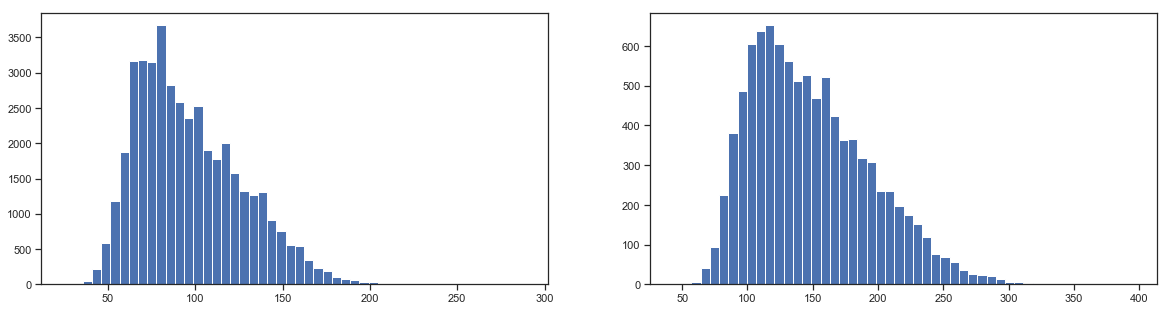

In [64]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].hist(data[data['best_of']==3]['minutes'], bins=50)
ax[1].hist(data[data['best_of']==5]['minutes'], bins=50)
plt.show()

## Etudes de la relation entre les variables explicatives et la durée d'un match de tennis

Tout d'abord nous pouvons nous demander quels sont les facteurs exercant la plus forte influance sur la durée d'un match de tennis. <br>
  
Premièrement, nous allons analyser l'influence de nos variables expliquatives sur la variables à prédire _minutes_. L'objectif est d'observer de manière "macroscopique" ce qui fait qu'un match sera long ou rapide. <br>

<font color='red'>A REVOIR</font>  
    1) Le nombre de sets nécessaires pour gagner le match (best of 3 / best of 5) ce qui revient au même que de séparer les matchs en "matchs de grand chelem"/"autres matchs"
    2) La surface sur laquelle ce joue le match (clay / hard / grass / carpet) 
    3) Le type de tournois (Grand Slam / Master / Other / Challenger / Satellite) 
    4) Le niveau du tournois du match (32eme / 16eme / 8eme ...) 
    5) La différence de ranking entre les deux joueurs 
    6) Le ranking moyen des deux joueurs (est ce que les joueurs de meilleur niveau on tendance à jouer plus rapidement ou non ?)

### Etudes de la corrélation de Pearson des variables quantitatives

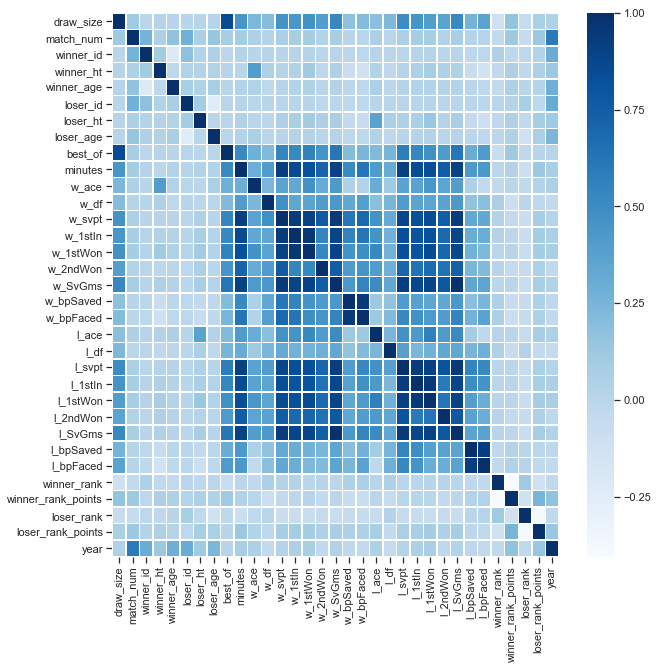

In [67]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), cmap='Blues', linewidths=.5)
plt.show()

Cette matrice de corrélation nous permet d'observer que :<br>
- la durée d'un match (_minutes_) est fortement corrélée avec les données lié à ce match. Plus un match dure plus le nombre de points joués dans le match est élevé. Cette information n'est pas utile pour notre problématique mais elle explique les fortes corrélations qui apparaissent sur la heatmap.
- on remarque également que _minutes_ est corrélée avec la variable _best_of_. La variable _best_of_ indique si un match se joue en 2 ou 3 sets gagnants (best of 3, best of 5).

### Analyse de l'effet de la règle 2 ou 3 sets gagnants sur la durée des matchs

In [68]:
data.groupby(['best_of'])['minutes'].mean()

best_of
3     96.587680
5    148.550319
Name: minutes, dtype: float64

On voit que la durée moyenne des matchs se jouant en 2 sets gagnants est très largement inférieure à la durée des matchs en 5 sets. 

In [69]:
avg_best_of_3_all = data.groupby(['best_of'])['minutes'].mean()[3]

In [70]:
avg_best_of_5_all = data.groupby(['best_of'])['minutes'].mean()[5]

### La surface du terrain

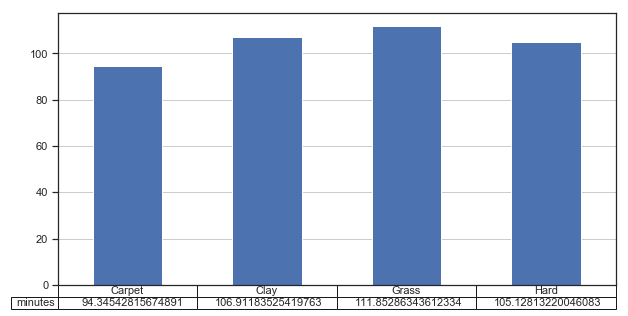

In [71]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
data.groupby(['surface'])['minutes'].mean().plot(kind='bar',figsize=(10,5), table=True, grid=True)
plt.show()

Ici on voit que les matchs sur gazon (Grass) ont tendance à être plus long que sur les autres surfaces. Cependant ce résultat est contre intuitif. En effet, il est connu que la surface où la balle va le plus vite et qui offre le moins de rebonds est le gazon. Il serait donc normal que les matchs les plus rapides aient lieu sur cette surface.<br><br>
Pour vérifer ce résultat, nous allons affiner l'analyse en séparant les matchs en best_of_3 des matchs best_of_5.

In [72]:
data.groupby(['best_of', 'surface'])['match_num'].count().unstack()

surface,Carpet,Clay,Grass,Hard
best_of,,,,
3,1364,14612,3352,23025
5,14,2481,2323,4751


On s'aperçoit que le ratio du nombre de matchs joués en best_of_3 par rapport à ceux joués en best_of_5 est proche de 1 pour le gazon, tandis que les autres surfaces présentent beaucoup plus de matchs joués en 3 sets gagnants qu'en 5 sets gagnants. C'est ce résultat qui nous explique ce pourquoi la moyenne globale de la durée des matchs sur gazons est plus élevée que sur les autres surfaces.  
  
Afin de ne pas biaiser la suite de notre analyse, nous devrons veiller à séparer ces deux catégories. 

In [73]:
data.groupby(['best_of', 'surface'])['minutes'].mean()

best_of  surface
3        Carpet      93.687683
         Clay        99.285108
         Grass       90.788783
         Hard        95.891857
5        Carpet     158.428571
         Clay       151.829907
         Grass      142.247525
         Hard       149.890339
Name: minutes, dtype: float64

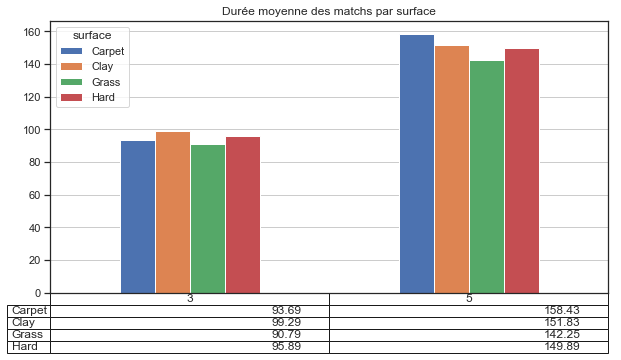

In [74]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
data.groupby(['best_of', 'surface'])['minutes'].mean().unstack().plot(kind='bar', figsize=(10,5),
                                                                      table=np.round(data.groupby(['best_of', 'surface'])['minutes'].mean().unstack().transpose(), 2)
                                                                      , grid=True, ax=ax
                                                                       , title='Durée moyenne des matchs par surface')
plt.show()

On voit ici qu'en effet la surface la plus rapide est le gazon, et qu'à l'opposé les surfaces plus lentes sont la terre battue ou la moquette. 

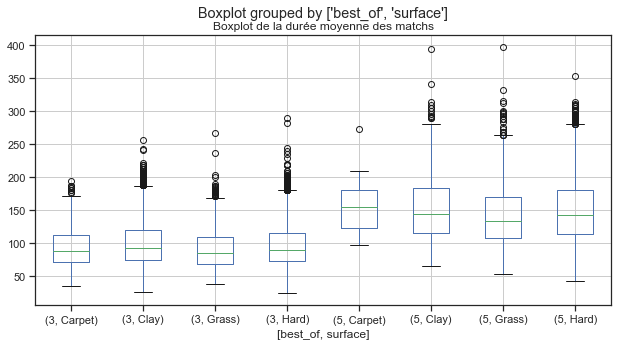

In [76]:
data.boxplot(column=['minutes'], by=['best_of', 'surface'], figsize=(10,5))
plt.title('Boxplot de la durée moyenne des matchs')
plt.show()

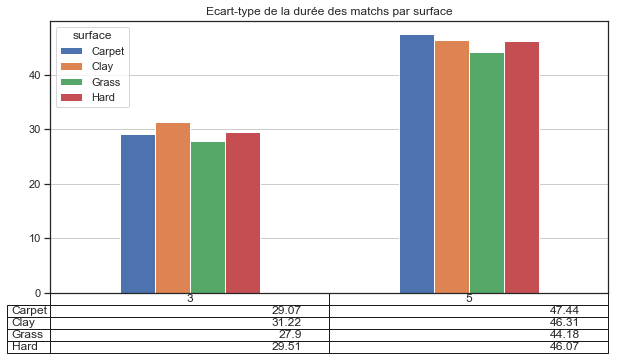

In [78]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
data.groupby(['best_of', 'surface'])['minutes'].std().unstack().plot(kind='bar', figsize=(10,5),
                                                                      table=np.round(data.groupby(['best_of', 'surface'])['minutes'].std().unstack().transpose(), 2)
                                                                      , grid=True, ax=ax
                                                                       , title='Ecart-type de la durée des matchs par surface')
plt.show()

L'études des écarts-type nous indique que la durée des matchs varie de manière homogène sur toutes les surfaces. <br>
L'objectif est donc de pouvoir expliquer cette variation par d'autres facteurs.

### Le type de tournois 

La variable _tourney_level_ informe sur le type de tournoi dans lequel est joué le match. Elle comporte les modalités suivantes :
<br>
- G – Grand Slam (Grand Chelem)
- M – Masters
- A – ATP (500 & 250)
- F – Tour final (ATP finals)

In [31]:
data.groupby(['best_of', 'tourney_level'])['match_num'].count()

best_of  tourney_level
3        A                32959
         F                  289
         M                11214
5        A                   44
         F                    7
         G                 9960
         M                   42
Name: match_num, dtype: int64

La catégorie F est très fortement sous-représenté. Cela s'explique par le fait qu'il s'agit uniquement du tournois de fin de saison ATP finals.<br>
On voit également que séparer le jeu de données en 2 selon le nombre de sets gagnants revient à répartir les matchs entre grand chelem et les autres tournois.

In [79]:
data.groupby(['best_of', 'tourney_level'])['minutes'].mean().unstack()

tourney_level,A,F,G,M
best_of,,,,
3,95.668726,104.233577,NaN,99.094511
5,160.522727,148.142857,148.442064,160.500000


In [80]:
data.groupby(['best_of', 'tourney_level'])['minutes'].median().unstack()

tourney_level,A,F,G,M
best_of,,,,
3,90.0,98.0,NaN,93.0
5,148.0,115.0,141.0,140.5


In [81]:
data.groupby(['best_of', 'tourney_level'])['minutes'].describe()

count        mean        std   min     25%    50%  \
best_of tourney_level                                                        
3       A              31403.0   95.668726  29.801255  25.0   72.00   90.0   
        F                274.0  104.233577  32.273956  50.0   77.25   98.0   
        M              10676.0   99.094511  30.606132  28.0   75.00   93.0   
5       A                 44.0  160.522727  48.522107  93.0  123.50  148.0   
        F                  7.0  148.142857  72.792922  96.0   98.00  115.0   
        G               9476.0  148.442064  45.740356  43.0  113.00  141.0   
        M                 42.0  160.500000  54.591275  93.0  120.25  140.5   

                         75%    max  
best_of tourney_level                
3       A              115.0  289.0  
        F              127.0  218.0  
        M              120.0  244.0  
5       A              185.5  300.0  
        F              178.5  273.0  
        G              179.0  396.0  
        M              188.0  314.0

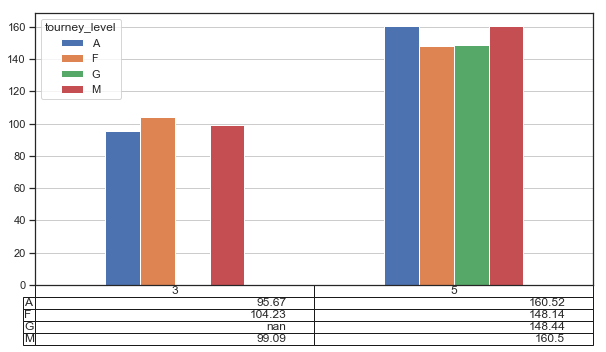

In [82]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
data.groupby(['best_of', 'tourney_level'])['minutes'].mean().unstack().plot(kind='bar', figsize=(10,5),
                                                                      table=np.round(data.groupby(['best_of', 'tourney_level'])['minutes'].mean().unstack().transpose(), 2)
                                                                      , grid=True, ax=ax)
plt.show()

### Le round

La variable "round" indique à quel stade du tournois se situe le match. Elle comporte les modalités suivantes : <br>
- R128 (128ème de finale), R64, R32, R16, R8
- QF (quart de finale), SF (demi finale), F (finale)
- RR (phase de poule), BR (petite finale), ER (Elimination round, tour particulier d'élimination après les qualifications)

In [36]:
data.groupby(['best_of', 'round'])['minutes'].mean().unstack()

round,BR,ER,F,QF,R128,R16,R32,R64,RR,SF
best_of,,,,,,,,,,
3,138.0,85.96875,105.160988,98.843621,98.002555,97.179407,94.873088,95.414547,99.254669,101.779723
5,NaN,NaN,166.891429,159.850318,145.512171,156.536392,150.822115,148.685908,NaN,166.706250


In [37]:
gb_round = data.groupby(['best_of', 'round'])['minutes'].mean()

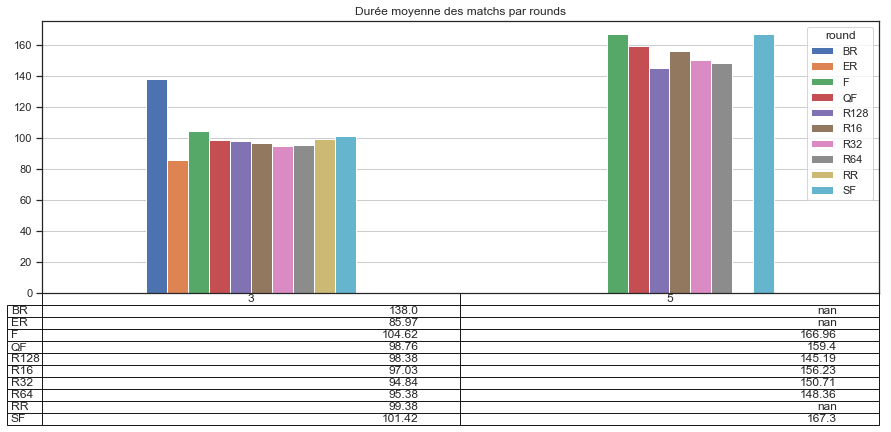

In [83]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
data.groupby(['best_of', 'round'])['minutes'].mean().unstack().plot(kind='bar', figsize=(15,5),
                                                                      table=np.round(data.groupby(['best_of', 'round'])['minutes'].mean().unstack().transpose(), 2)
                                                                      ,grid=True
                                                                      ,ax=ax
                                                                       ,title='Durée moyenne des matchs par rounds' )
plt.show()

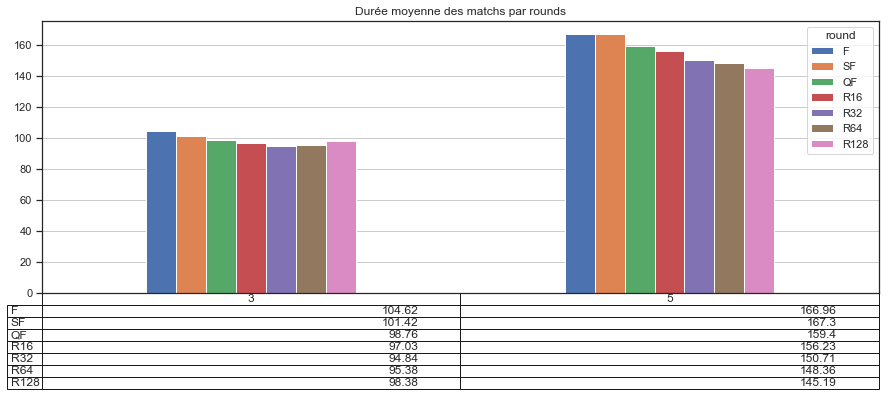

In [84]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
data.groupby(['best_of', 'round'])['minutes'].mean().unstack()[['F', 'SF', 'QF', 'R16', 'R32', 'R64', 'R128']].plot(kind='bar', figsize=(15,5),
                                                                      table=np.round(data.groupby(['best_of', 'round'])['minutes'].mean().unstack()[['F', 'SF', 'QF', 'R16', 'R32', 'R64', 'R128']].transpose(), 2)
                                                                      , grid=True
                                                                      , ax=ax
                                                                      , title='Durée moyenne des matchs par rounds')
plt.show()

En organisant les rounds par ordre d'importance dans un tournoi on s'aperçoit que les matchs de phases finales sont en moyenne plus longs que les autres.<br>
  
<center><font color='black'>On peut alors se demander s'il y a lien entre le niveau des matchs et leur durée.</font></center>

### Analyse de l'évolution de la durée des matchs en fonction du classement des joueurs

Dans cette partie nous allons étudier s'il existe un lien entre le niveau d'un match et sa durée. Nous regarderons premièrement si l'homogénéité du classement des adversaires d'un match de tennis à une influence sur sa durée. Deuxièmement nous regarderons si la durée des matchs varie en fonction du classement moyen des deux joueurs. L'idée est de voir si les matchs de plus haut niveau durent plus ou moins longtemps que les autres.

### La différence de classement entre les deux joueurs

On va créer une variable _diff_ranking_ qui sera la différence de classement entre les deux joueurs d'un match. Une forte valeur de _diff_ranking_ indique un niveau hétérogène dans le match tandis qu'une faible valeur indique un niveau homogène.

In [85]:
data['diff_ranking'] = data.apply(lambda x: abs(x.winner_rank - x.loser_rank), axis=1)

In [86]:
data['diff_ranking'].describe()

count    51772.000000
mean        71.765684
std        111.815620
min          1.000000
25%         19.000000
50%         41.000000
75%         79.000000
max       2125.000000
Name: diff_ranking, dtype: float64

In [87]:
data['diff_ranking_categories'] = pd.cut(data['diff_ranking'], [0,20,50,70,200,450,1000,3000])

On utilise la méthode `cut` de pandas afin de regrouper les différences de classement en catégories mieux visualiser l'évolution de la durée des matchs.

In [88]:
data.groupby(['best_of', 'diff_ranking_categories'])['minutes'].mean().unstack()

diff_ranking_categories,"(0, 20]","(20, 50]","(50, 70]","(70, 200]","(200, 450]","(450, 1000]","(1000, 3000]"
best_of,,,,,,,
3,98.827107,97.239487,95.635835,95.230624,92.677878,87.918336,75.806122
5,157.527939,151.160044,146.216277,142.318893,134.071979,137.428571,134.071429


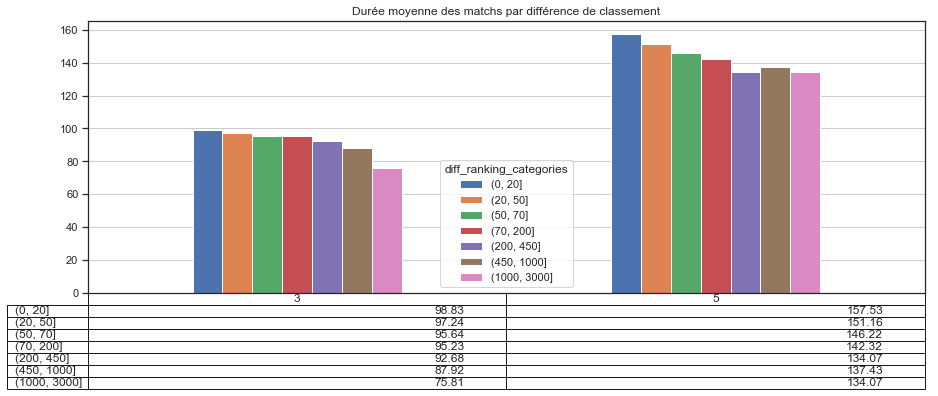

In [89]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
data.groupby(['best_of', 'diff_ranking_categories'])['minutes'].mean().unstack().plot(kind='bar', figsize=(15,5),
                                                                      table=np.round(data.groupby(['best_of', 'diff_ranking_categories'])['minutes'].mean().unstack().transpose(), 2)
                                                                      , grid=True, ax=ax
                                                                       , title='Durée moyenne des matchs par différence de classement')
plt.show()

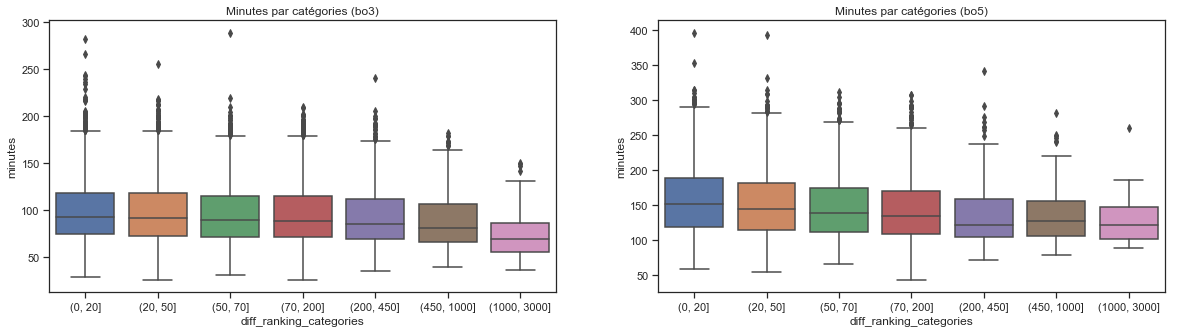

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x="diff_ranking_categories", y="minutes", data=data[data['best_of']==3],
            ax=axes[0]).set_title('Minutes par catégories (bo3)')
sns.boxplot(x="diff_ranking_categories", y="minutes", data=data[data['best_of']==5],
            ax=axes[1]).set_title('Minutes par catégories (bo5)')
plt.show()

On voit qu'en moyenne les matchs dont le niveau de jeu est homogène sont plus long que ceux avec un niveau hétérogène à l'aide des bar plot. Cependant, un faible nombre de matchs suffit à "tirer" les moyennes vers le haut comme nous le montre les box plot.

In [92]:
data[['minutes', 'diff_ranking']].corr()

,minutes,diff_ranking
minutes,1.000000,-0.065243
diff_ranking,-0.065243,1.000000


La faible corrélation entre la variable _minutes_ et _diff_ranking_ confirme ce que nous avions observé sur les graphiques précédants.

### Le classement moyen entre les deux joueurs

A l'instar de ce que nous avons fait précédemment, nous allons créer une variable _avg_ranking_ qui représentera le classement  moyen des deux joueurs. Une forte valeur de _avg_ranking_ indique un niveau moyen faible tandis qu'une faible valeur forte indique un niveau élevé (le classement ATP dans l'ordre décroissant).

In [100]:
data['avg_ranking'] = data.apply(lambda x: (x.winner_rank + x.loser_rank)/2, axis=1)

In [101]:
data['avg_ranking'].describe()

count    51772.000000
mean        75.295459
std         71.757582
min          1.500000
25%         35.500000
50%         58.500000
75%         90.500000
max       1484.000000
Name: avg_ranking, dtype: float64

In [102]:
data['avg_ranking_categories'] = pd.cut(data['avg_ranking'], [0,35,60,90,125,240,500,1500])

In [103]:
data.groupby(['best_of', 'avg_ranking_categories'])['minutes'].mean().unstack()

avg_ranking_categories,"(0, 35]","(35, 60]","(60, 90]","(90, 125]","(125, 240]","(240, 500]","(500, 1500]"
best_of,,,,,,,
3,99.620726,97.016596,95.628933,95.291731,94.511489,91.453125,83.309859
5,155.475848,146.208680,146.804764,144.991482,147.176179,136.335714,146.916667


In [104]:
data[['minutes', 'avg_ranking']].corr()

,minutes,avg_ranking
minutes,1.000000,-0.080041
avg_ranking,-0.080041,1.000000


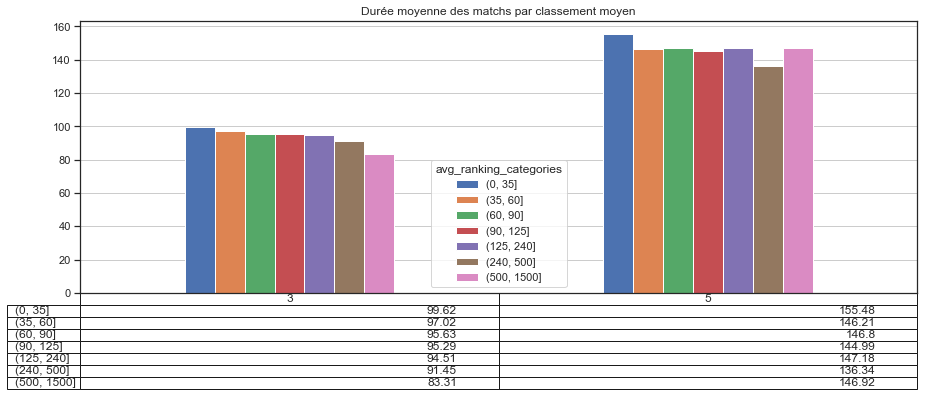

In [99]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)
data.groupby(['best_of', 'avg_ranking_categories'])['minutes'].mean().unstack().plot(kind='bar', figsize=(15,5),
                                                                      table=np.round(data.groupby(['best_of', 'avg_ranking_categories'])['minutes'].mean().unstack().transpose(), 2)
                                                                      ,grid=True
                                                                      ,ax=ax
                                                                      , title='Durée moyenne des matchs par classement moyen')
plt.show()

### Analyse du top 1000 des matchs les plus rapides

In [53]:
top_1000_rapides_b03 = data[data['best_of']==3].nsmallest(1000, 'minutes')
top_1000_rapides_b05 = data[data['best_of']==5].nsmallest(1000, 'minutes')

###  Analyse du top 1000 des matchs les plus lents

In [54]:
top_1000_lents_b03 = data[data['best_of']==3].nlargest(1000, 'minutes')
top_1000_lents_b05 = data[data['best_of']==5].nlargest(1000, 'minutes')

Comparer les moyenne des ranks dans les différents matchs. On voit que dans les matchs les plus rapides le niveau est un peu moins bon que dans les matchs les plus lents. <br>
De manière général les longs matchs sont des matchs de haut niveai

In [55]:
diff_between_lent_rapide_b03 =[top_1000_lents_b03['minutes'].mean()-top_1000_rapides_b03['minutes'].mean(),
top_1000_lents_b03['winner_rank'].mean()-top_1000_rapides_b03['winner_rank'].mean(),
top_1000_lents_b03['loser_rank'].mean()-top_1000_rapides_b03['loser_rank'].mean(),
top_1000_lents_b03['diff_ranking'].mean()-top_1000_rapides_b03['diff_ranking'].mean(),
top_1000_lents_b03['avg_ranking'].mean()-top_1000_rapides_b03['avg_ranking'].mean()]

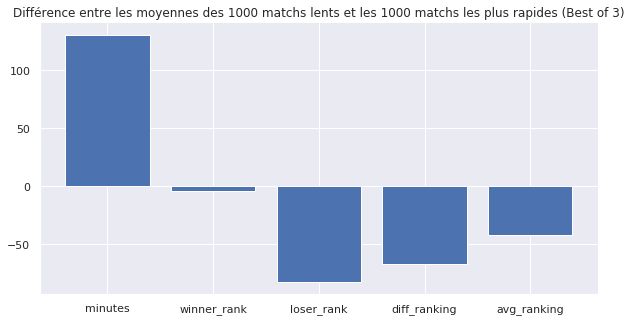

In [77]:
plt.figure(figsize=(10,5))
plt.tight_layout(pad=2)
plt.bar(['minutes', 'winner_rank',  'loser_rank', 'diff_ranking', 'avg_ranking'],diff_between_lent_rapide_b03)
plt.title('Différence entre les moyennes des 1000 matchs lents et les 1000 matchs les plus rapides (Best of 3)')
sns.despine()
plt.show()

In [57]:
diff_between_lent_rapide_b05 =[top_1000_lents_b05['minutes'].mean()-top_1000_rapides_b05['minutes'].mean(),
top_1000_lents_b05['winner_rank'].mean()-top_1000_rapides_b05['winner_rank'].mean(),
top_1000_lents_b05['loser_rank'].mean()-top_1000_rapides_b05['loser_rank'].mean(),
top_1000_lents_b05['diff_ranking'].mean()-top_1000_rapides_b05['diff_ranking'].mean(),
top_1000_lents_b05['avg_ranking'].mean()-top_1000_rapides_b05['avg_ranking'].mean()]

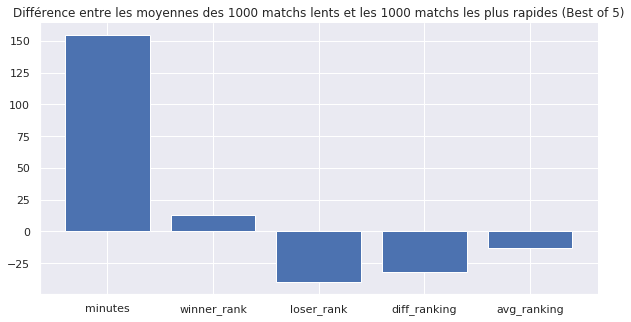

In [76]:
plt.figure(figsize=(10,5))
plt.tight_layout(pad=2)
plt.bar(['minutes', 'winner_rank',  'loser_rank', 'diff_ranking', 'avg_ranking'],diff_between_lent_rapide_b05)
sns.despine()
plt.title('Différence entre les moyennes des 1000 matchs lents et les 1000 matchs les plus rapides (Best of 5)')
plt.show()

On constate via différence entre le top 1000 des matchs les plus lents et des matchs les plus rapides que les matchs qui dure plus longtemps (lents) on tendance à avoir un niveau plus homogène. <br>
La bar rouge de la colonne diff_ranking nous indique que plus un matchs est "lents" plus la différence de ranking est faible avec (-70 classements de différence en moins entre les deux joueurs pour les best of 3 et -35 pour les best of 5).<br>
La même analyse sur la colonne avg ranking nous indique que le niveau moyen est légérement meilleurs dans les matchs les plus longs.

In [59]:
data.groupby('surface')['minutes'].sort_values('tourney_date')

AttributeError: Cannot access callable attribute 'sort_values' of 'SeriesGroupBy' objects, try using the 'apply' method

In [ ]:
df = pd.DataFrame()

In [ ]:
df['int'] = [i for i in range(50)]

In [ ]:
df

In [ ]:
df['roll']=df.rolling(3, win_type='triang').mean()

In [ ]:
df = pd.Series(data=np.arange(10), 
               index=pd.date_range('2000', periods=10))

In [ ]:
df.head()

In [ ]:
df['roll']=df.rolling(2, closed='left').mean()

In [ ]:
df

In [ ]:
def rolling_avg(seq, period):
    res = []
    for i in period:
        